In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [52]:
data = pd.read_csv("merged_sensor_data.csv")
data.head()

accX     accY     accZ  gsr    gyroX    gyroY    gyroZ  humidity  pulse  \
0  0.68262 -0.17603  0.77124    0 -0.13997 -0.43032 -0.57615        56   3034   
1  0.68604 -0.17700  0.76270    0 -0.13997  0.71472 -0.17921        56   3191   
2  0.67871 -0.18408  0.78101    0 -0.35371  0.16510 -0.05707        56   3106   
3  0.70239 -0.08838  0.77197  368 -0.78119  0.85212  0.43148        56   3057   
4  0.70532 -0.09058  0.76807  400 -0.07890 -0.17078 -0.59142        56   3215   

   temperature  timestamp   state  
0         32.8       6191    calm  
1         32.8       8611    calm  
2         32.8      19751    calm  
3         32.8     131264  normal  
4         32.8     132515  normal

In [53]:
features = ["accX", "accY", "accZ", "gsr", "gyroX", "gyroY", "gyroZ",
            "humidity", "pulse", "temperature", "timestamp"]
target = "state"

X = data[features]
y = data[target]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [55]:
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = clf.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [58]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Accuracy: 1.0000

Confusion Matrix:
 [[104   0   0]
 [  0  88   0]
 [  0   0  51]]

Classification Report:
               precision    recall  f1-score   support

        calm       1.00      1.00      1.00       104
      normal       1.00      1.00      1.00        88
      stress       1.00      1.00      1.00        51

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243



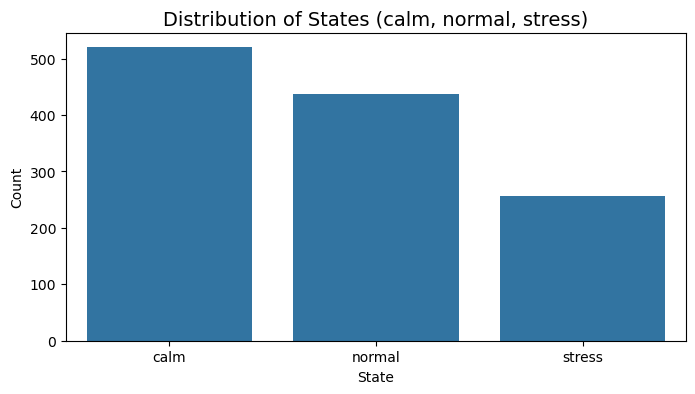

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("merged_sensor_data.csv")


plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='state')
plt.title("Distribution of States (calm, normal, stress)", fontsize=14)
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

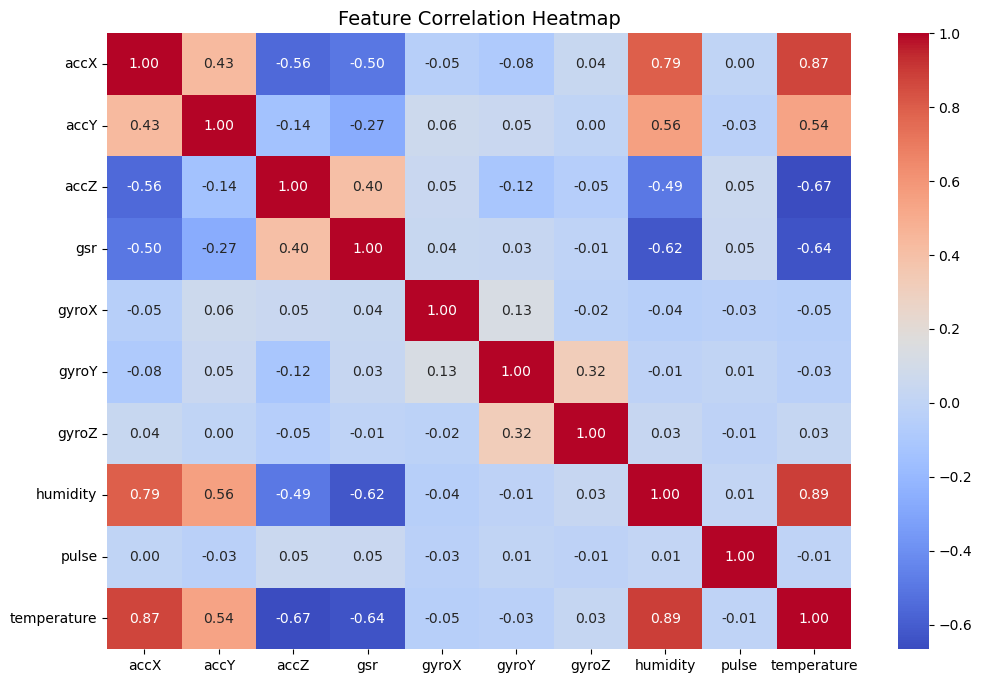

In [60]:
columns_for_corr = [col for col in data.columns if col not in ["state", "timestamp"]]
corr = data[columns_for_corr].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

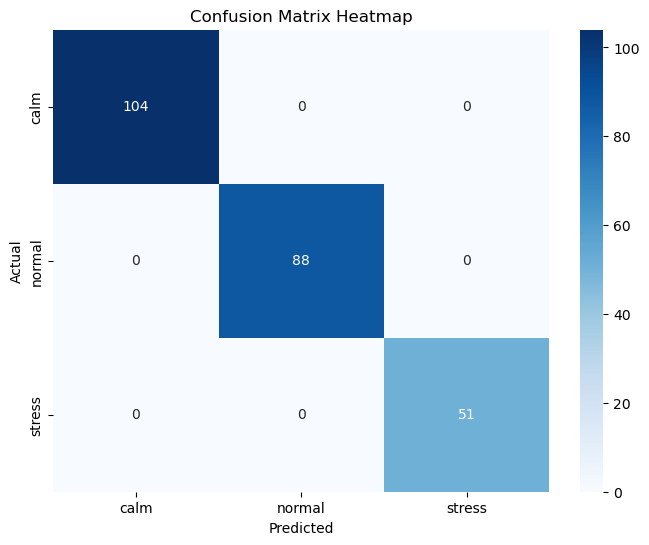

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

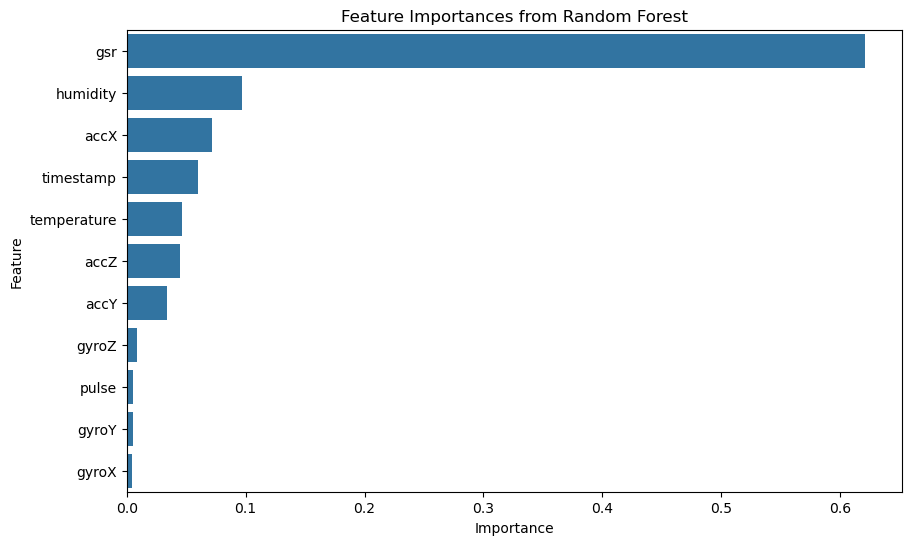

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X.columns

importances = clf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importances from Random Forest')
plt.show()


In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use best estimator to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nClassification Report with Best Model:\n", classification_report(y_test, y_pred_best, zero_division=0))


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9958784033431436

Classification Report with Best Model:
               precision    recall  f1-score   support

        calm       1.00      1.00      1.00       104
      normal       1.00      1.00      1.00        88
      stress       1.00      1.00      1.00        51

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243



In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Cross-validation accuracy scores: [0.99176955 1.         0.99588477 1.         0.7768595 ]
Mean cross-validation accuracy: 0.9529027650239771


In [65]:
import joblib
joblib.dump(clf, "stress_model.pkl")
print("\n✅ Model saved as 'stress_model.pkl'")



✅ Model saved as 'stress_model.pkl'
